In [ ]:
%load_ext autoreload
%autoreload

import os
import sys
from pathlib import Path
module_path = os.path.join(os.getcwd(),"Dropbox\Sch\SC4010 CRYPTOGRAPHY\Proj\kyber\src") #TODO: CHANGE PATH TO SOURCE CODE
sys.path.insert(0, module_path)

In [ ]:
from kyber_kem import kyber_kem
from kyber_kem import *
import itertools

## KYBER-512 demo ##

Kyber 512 is a key encapsulation mechanism that shares a secret 256-bit key. Its offers 128 bits of random bit generator strength.

In [ ]:
KYBER_512 = kyber_kem(3329, 256, 2, 2, 2, 12)


Key generation: Alice generates her secret key, and sends over the public parameters rho and t.

In [ ]:
ek, dk = KYBER_512.kem_keygen()
rho, t = ek
print("PUBLIC KEY: Alice sends this to Bob")
print_bytes(rho + t)



PUBLIC KEY: Alice sends this to Bob
b'd5467cd377f0257884e37f738f70344fc27f93c6e20bbeb8bfabfb93478960da631a28c2ba72fd3659539b6bf9513203413dcc467fad088d6150ae6dac682d79c7c239bbb6575b41240a27c8b533310d8359124a2262b694958e1c1ed1e194e8a55fda50b758fa670c7531b9ab11fa15529e3140d1483a54e14adcd0bd1c983b6ce629135a47e496694d8229131c1d86e0c775cb5ccf9ab696932d2863922fd68f9abc051c568783c2822db33456d25a65c4a95bd4778687a1376c2d69a9cfd8bc4d3ef747307589b6271b44846c4884c18786b5a4f36d618b82a45a1e9eb9cd019c4b4e4b603ca5c405766ff7040fcd966b86b67c4acccb2067a5419bc5e3b450a5c42cf7dcc9f7e1c604fb0f2561bc43b015a3589b1219022630821835ab8f3b8a3abc41db6b0834b3287af623020172cce7003e295c7a5b185f38231f69364c870a887150fc91153c5c0b9d152f1c84c318f64154fb21d8b7c7cb9864113a7158e473380835b57cbafe96735b1530a6c90e9a84cbe4c4477247608f58ac02c320721bbe1cbc8dc8702b950bccdd20acf9e278dafc373d94247549107305ca62522ebf106f91b443db0487d883c6168446a950328557a338c59aadec547520cf5fc4b3cde31b3a34b14123047271973063051168b18f854b0fe43947fbbdae29

Encapsulation: Bob generates a secret message m and derives the shared key K from it. From Alice's public parameters he derives the ciphertext, consisting of u and v. 

In [ ]:

u_bytes, v_bytes, K = KYBER_512.kem_encapsulate(ek)
print("CIPHERTEXT: Bob sends this to Alice")
print_bytes(u_bytes + v_bytes)

CIPHERTEXT: Bob sends this to Alice
b'ac195c904bb743659f4ea1505eca5cb9851feccb4e5b8a7145137d7bf7ab14189cf54c799fca65e64596bbf4136b2a4ab5014bba6b4ddc134836032cf8146dfcd3ce5ca4818ffc5bcfcac8cf5907412996522022f2352e435a0d90ca1aa4c241b6175c10a91929c239d473029416178b77afd74b326aeb6810ba6389784dc7718b2381810cb91d431638a2fb78ccca1482d173bb24374443ca368804d4a925004b77af83aae6f2a3e251a2f18756bb2c9bf23414d1e315e2c879487083ff000fc73a9736054c493c318f7836ef2ab9afd690ece8bdc85023ebbab363b51e6d07523c3c335ac7502196772cf28d6f072b1c4abb324965d44b1e37b8bea6687e19d26d29d69449bc4747f82c8341c4d6507884994e164c2915f182427c3e36f62f83628b1640b9ac31bb4d4cc98e0906296c645419867454591f5b80d79323c718a88614946e41c35026a1ae6a14ac302999d2873d990ebac445a45c7266b4bf3db87a10839cf69ba035888e757042e22c4a90983b5e5a299e077723146cdd82491e3352857307649b55dfb2118fea4fbe64b6733b979742ad46d261f4a6cb95fca870061cc72c36c89b706d84beb037032b0a3f9333576861af67bbbde31c5242457541f73ac4eb3dc7b17d735337e60a532c70b769e97865934b9e52219c5a5dff

In [ ]:
print("SECRET SHARED KEY GENERATED BY BOB: ")
print_bytes(K)

SECRET SHARED KEY GENERATED BY BOB: 
b'989df0e3eb5f683b791f6bbdb63b73cad2b2ff2118bd3c66fc60eac1b6f77bd2'


Decapsulation: Alice decrypts the ciphertext and computes K_prime. She then checks that K_prime will give the correct ciphertext, meaning there has been no decapsulation failure. (The chance of decapsulation failure is very slim). If there has been decapsulation failure, a pre-generated garbage key is returned.

In [ ]:

K_prime = KYBER_512.kem_decapsulate(u_bytes, v_bytes, dk)
print("SECRET SHARED KEY DECAPSULATED BY ALICE: ")
print_bytes(K_prime)

SECRET SHARED KEY DECAPSULATED BY ALICE: 
b'989df0e3eb5f683b791f6bbdb63b73cad2b2ff2118bd3c66fc60eac1b6f77bd2'


## ATTACKS ##

### Bad RNG ###

Bob is too lazy to come up with a good 256-bit message to encrypt, and decides to fix the first 31 bytes of it. What's the worst that could happen? Nobody knows what he has done. And after all, we still have all that fancy schmancy quantum protection, right?

In [ ]:
KYBER_512_BadRNG = kyber_kem(3329, 256, 2, 2, 2, 12)
ek1, dk1 = KYBER_512_BadRNG.kem_keygen()
rho1, t1 = ek1
print("PUBLIC KEY: Alice sends this to Bob")
print_bytes(rho + t)

PUBLIC KEY: Alice sends this to Bob
b'd5467cd377f0257884e37f738f70344fc27f93c6e20bbeb8bfabfb93478960da631a28c2ba72fd3659539b6bf9513203413dcc467fad088d6150ae6dac682d79c7c239bbb6575b41240a27c8b533310d8359124a2262b694958e1c1ed1e194e8a55fda50b758fa670c7531b9ab11fa15529e3140d1483a54e14adcd0bd1c983b6ce629135a47e496694d8229131c1d86e0c775cb5ccf9ab696932d2863922fd68f9abc051c568783c2822db33456d25a65c4a95bd4778687a1376c2d69a9cfd8bc4d3ef747307589b6271b44846c4884c18786b5a4f36d618b82a45a1e9eb9cd019c4b4e4b603ca5c405766ff7040fcd966b86b67c4acccb2067a5419bc5e3b450a5c42cf7dcc9f7e1c604fb0f2561bc43b015a3589b1219022630821835ab8f3b8a3abc41db6b0834b3287af623020172cce7003e295c7a5b185f38231f69364c870a887150fc91153c5c0b9d152f1c84c318f64154fb21d8b7c7cb9864113a7158e473380835b57cbafe96735b1530a6c90e9a84cbe4c4477247608f58ac02c320721bbe1cbc8dc8702b950bccdd20acf9e278dafc373d94247549107305ca62522ebf106f91b443db0487d883c6168446a950328557a338c59aadec547520cf5fc4b3cde31b3a34b14123047271973063051168b18f854b0fe43947fbbdae29

In [ ]:
FIXED_BYTES = b'\x91\x98\xfc\x1e(\x0c\x84}V\x02jJ\x8a\x1a\xe7\x87\x1a\x8fI\\\xe7s\xd3u"[es\xbb\xd2\xac'

u_bytes1, v_bytes1, K1 = KYBER_512_BadRNG.kem_encapsulate(ek1, bad_rng=True, fixed_bytes = FIXED_BYTES)
print("CIPHERTEXT: Bob sends this to Alice")
print_bytes(u_bytes1 + v_bytes1)
print(K1)

CIPHERTEXT: Bob sends this to Alice
b'5e521d08597d63570f44840278d50dd195a2a37b61c46379850866a977bb417210debb8446285904268476fb5c57fa803ee95a3b6a7aba247e40c1422f56215463b16435b14c45ba5952be072172bc736df89448e1a71569725df1348a9bd05a82828ba3478a15a341c25334e813c298005088ba617ae4ce22d60b750bb573e09e562350381ac91d3b3c2fdac3ede6a41d648a461545aebb978ac860ea1292b4583c83613ceb255785c7c7161725b5a975ef3c1613ac56d2fb92c9521acabb3530c2415594ca4d711e8c47875e57a6f423123096aee4f9c11f26caad7257be4c3403db1f150aad84b40e498b66f9e27ac5f69ffc37519b912b2c45c7c67a3a75aa08d09415488aacbb6316f082430631be0f3c7d82178d49ec3f1c51a314ac644d876c7d2366e9ca57b1641354272f07a58533465bdf839550d75d7310a3e4cc5f9c669544bca51c9c11d0a411d9955297a2609421b121714b53355fa4a11ac1db66016c7a261c20ce77719e9943db310385eb306aba0624967f804212199576608b35167960c7dbb42d70c64f5b92fd170dfe05875c1647cd170444da9046a72462c92d3b7bbef8f51227f84d32153e06a03bba714156526b55f9bf9bd01a784799b49b9043c227c571865efab0e86847d8928b1f0c4125833c986659c7e276bb

Unfortunately for Bob, Eve has managed to steal his fixed_bytes while being invisible. Just a byte of entrophy, she can easily brute force his shared secret key from his ciphertext!

In [ ]:
def brute_force(ek1, u_bytes, v_bytes, fixed_bytes, possible_bytes):
    rho1, t1 = ek1
    for bytes_ in possible_bytes:
        possible_m = fixed_bytes+bytes_

        h = KYBER_512_BadRNG._H(rho1 + t1)
        K_prime, R_prime = KYBER_512_BadRNG._G(possible_m + h)
        u_prime, v_prime = KYBER_512_BadRNG.kem_encrypt(possible_m, ek1, R_prime)

        if(u_bytes == u_prime and v_bytes == v_prime):
            return K_prime
        # if(K_prime == K1):
        #     return K_prime


In [ ]:
%%time

byte_strings = itertools.product(range(256))
possible_bytes =  [bytes(b1) for b1 in byte_strings]
K_prime = brute_force(ek1, u_bytes1, v_bytes1, FIXED_BYTES, possible_bytes)
if(K_prime):
    print("SECRET SHARED KEY BRUTE FORCED BY EVE: ")
    print_bytes(K_prime)

SECRET SHARED KEY BRUTE FORCED BY EVE: 
b'e70ebb73f509003e1d606b886de1a6251c61b78010671312c0a937f6ca93596a'
CPU times: total: 500 ms
Wall time: 514 ms


In [ ]:
print("SECRET SHARED KEY GENERATED BY BOB: ")
print_bytes(K1)

SECRET SHARED KEY GENERATED BY BOB: 
b'e70ebb73f509003e1d606b886de1a6251c61b78010671312c0a937f6ca93596a'


In [ ]:
K_prime1 = KYBER_512.kem_decapsulate(u_bytes1, v_bytes1, dk1)
print("SECRET SHARED KEY DECAPSULATED BY ALICE: ")
print_bytes(K_prime1)

SECRET SHARED KEY DECAPSULATED BY ALICE: 
b'e70ebb73f509003e1d606b886de1a6251c61b78010671312c0a937f6ca93596a'


### Baby Kyberslash ###

Kyberslash1: exploits division leaking time when converting m from polynomial to byte during decapsulation.

In [ ]:
import pandas as pd

In [ ]:
Baby_Kyber = kyber_kem(3329, 8, 2, 2, 2, 12) #n = 8

In [ ]:
df1 = pd.DataFrame({'m_value': [], 'decode_timing': []})

for i in range(256):
    m_bytes = i.to_bytes(1, 'little')
    m_poly = bytes_to_poly(m_bytes, 1, Baby_Kyber.n, Baby_Kyber.q)
    timing_score = Baby_Kyber.decode_timing_score(m_poly)
    df1.loc[len(df1)] = [i, timing_score]

In [ ]:
df1.corr()

,m_value,decode_timing
m_value,1.000000,0.609985
decode_timing,0.609985,1.000000


C:\Users\wengp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='m_value', ylabel='decode_timing'>

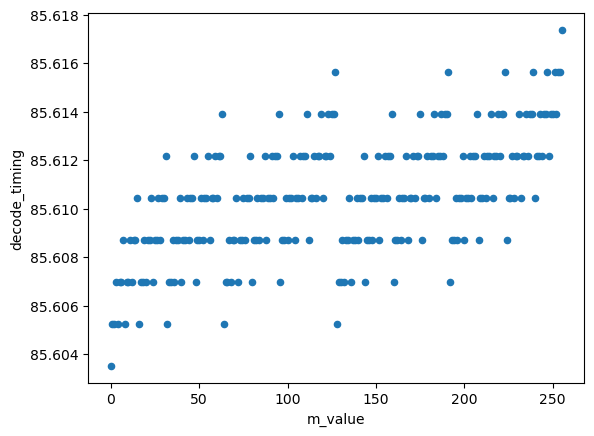

In [ ]:
df1.plot.scatter(x= "m_value", y = "decode_timing")

Kyberslash2: exploits division leaking time when compressing v during encapsulation

In [ ]:
ek2, dk2 = Baby_Kyber.kem_keygen()
rho2, t2 = ek2
print("PUBLIC KEY: Alice sends this to Bob")
print_bytes(rho2 + t2)

PUBLIC KEY: Alice sends this to Bob
b'551a2a3a5b2b2fee97a3fbf8beec0bc281e7b02c91c78e5797'


In [ ]:
_, v_bytes2, _ = Baby_Kyber.kem_encapsulate(ek2, bad_rng=True, fixed_bytes = b'\x00')
print(Baby_Kyber.compression_timing_score(v_bytes2))
_, v_bytes3, _ = Baby_Kyber.kem_encapsulate(ek2, bad_rng=True, fixed_bytes = b'\x01')
print(Baby_Kyber.compression_timing_score(v_bytes3))

13168
13537


In [ ]:
df2 = pd.DataFrame({'m_value': [], 'v_timing_score': []})


for i in range(100):
    _ek, _ = Baby_Kyber.kem_keygen()

    for j in [0,128]:
        m_bytes = j.to_bytes(1, 'little')
        _, _v_bytes, _ = Baby_Kyber.kem_encapsulate(_ek, bad_rng=True, fixed_bytes = m_bytes)
        _v_score = Baby_Kyber.compression_timing_score(_v_bytes)
        df2.loc[len(df2)] = [j, _v_score]

In [ ]:
df2.corr()

,m_value,v_timing_score
m_value,1.000000,-0.070401
v_timing_score,-0.070401,1.000000


C:\Users\wengp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='m_value', ylabel='v_timing_score'>

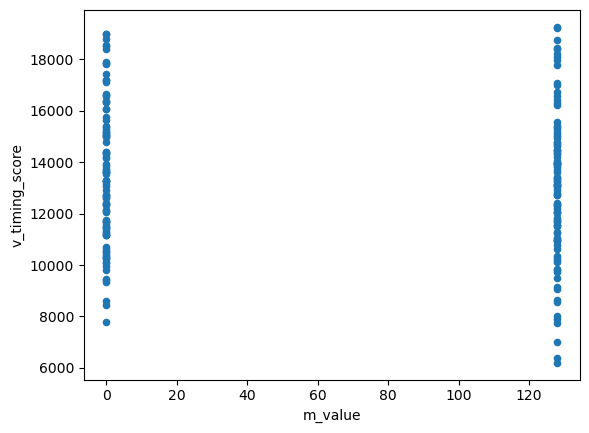

In [ ]:
df2.plot.scatter(x= "m_value", y = "v_timing_score")